<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/schauppi/Abschnitt_3_Neural_Network_regression_with_TensorFlow/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we´re going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number



In [1]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


#Create data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

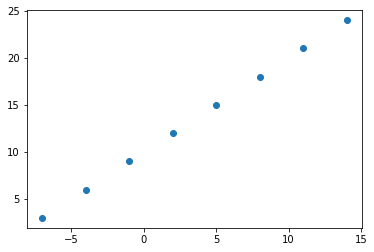

In [3]:
#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X, Y)

#Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = Y[0].shape

In [6]:
print(input_shape)
print(output_shape)

()
()


In [7]:
X[0], Y[0]

(-7.0, 3.0)